### EcoFOCIpy ADCP QC - 23CKP-1A

- mostly remove >500 cm/s flows in u/v


In [46]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

from EcoFOCIpy.plots import TimeSeriesStickPlot

In [47]:
xdf = xa.load_dataset('23ckp3a_velein_0033m.nc')

In [48]:
len(xdf.depth)

23

/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
/Users/bell/src/ecofocipy/src/EcoFOCIpy/plots/TimeSeriesStickPlot.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xtick

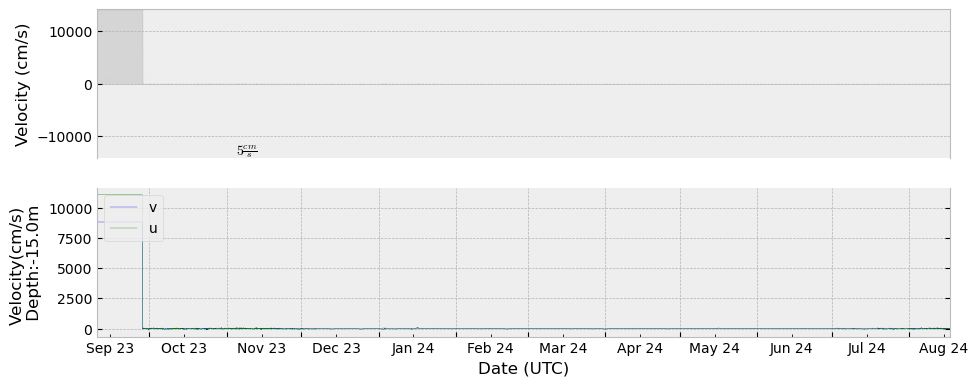

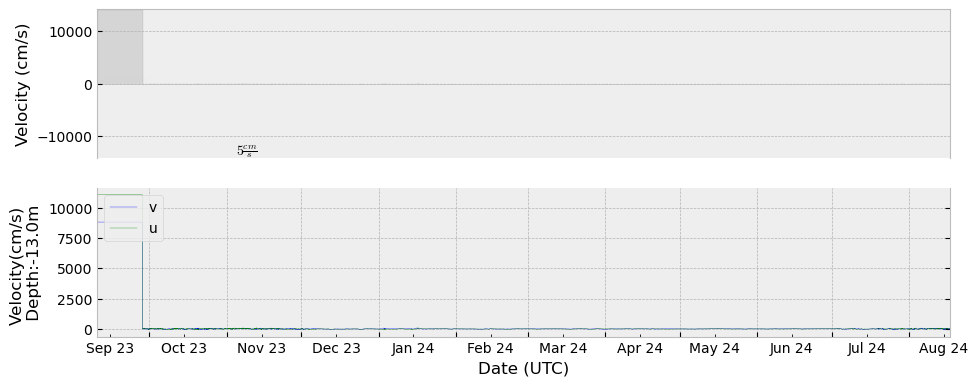

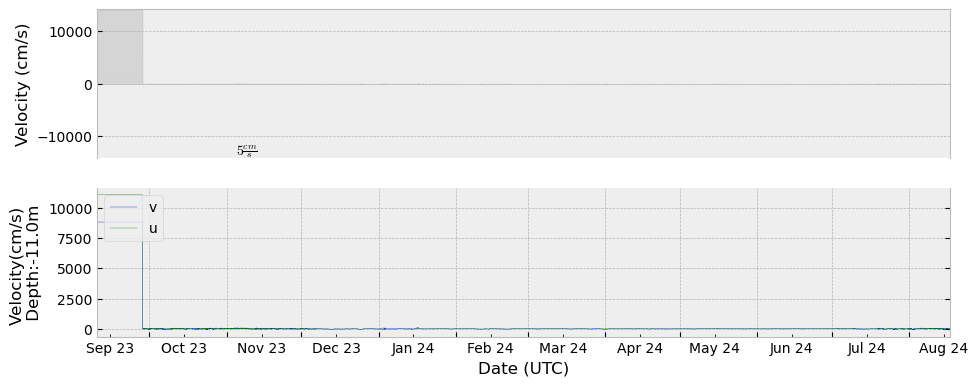

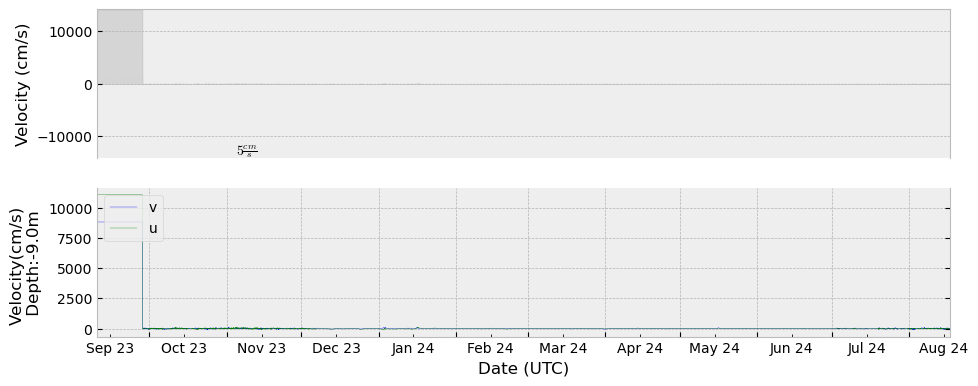

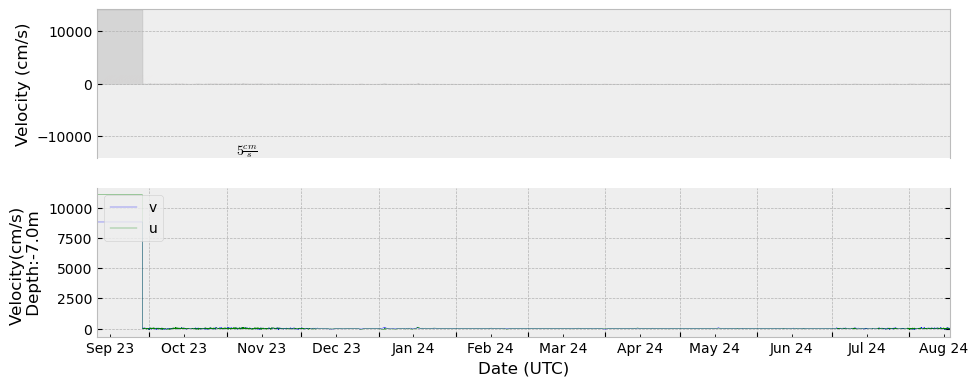

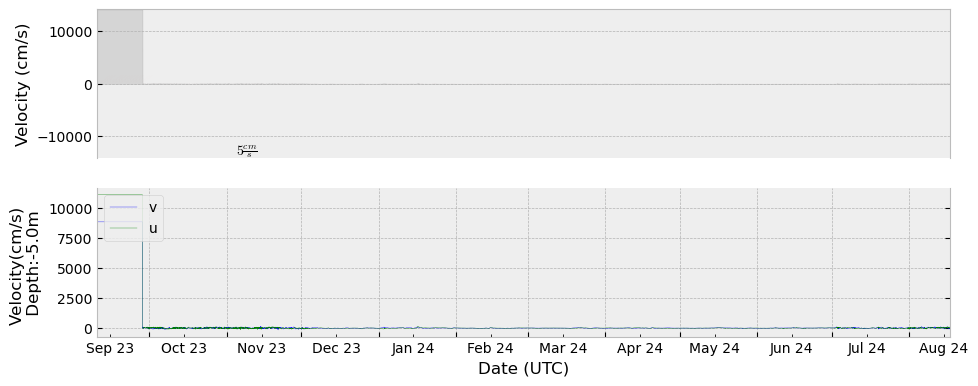

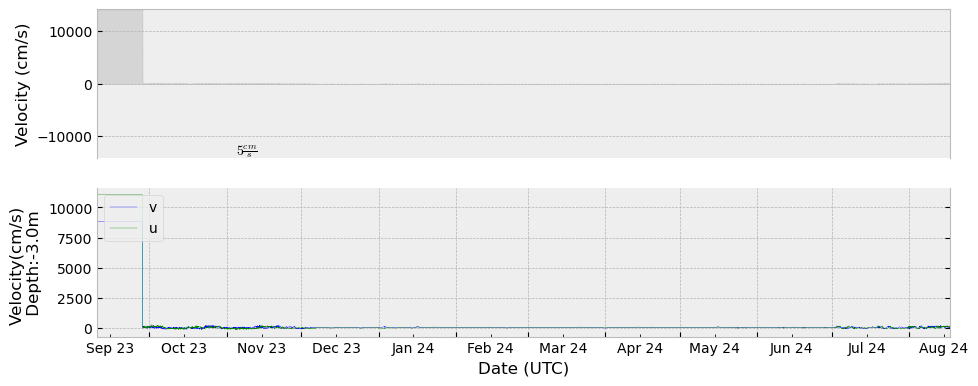

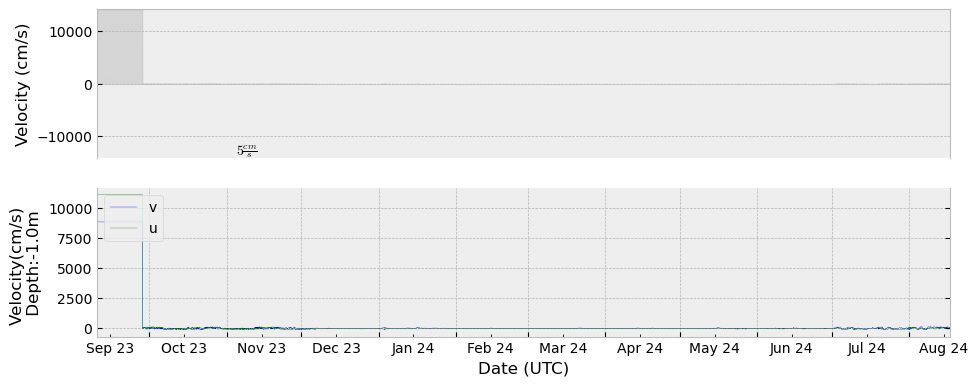

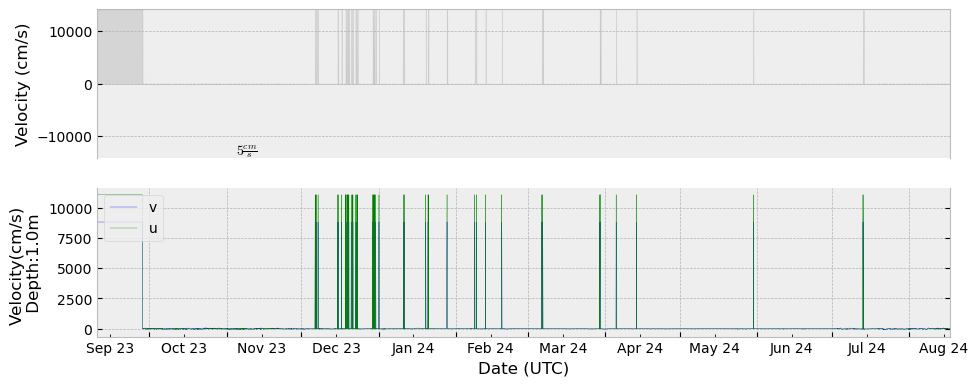

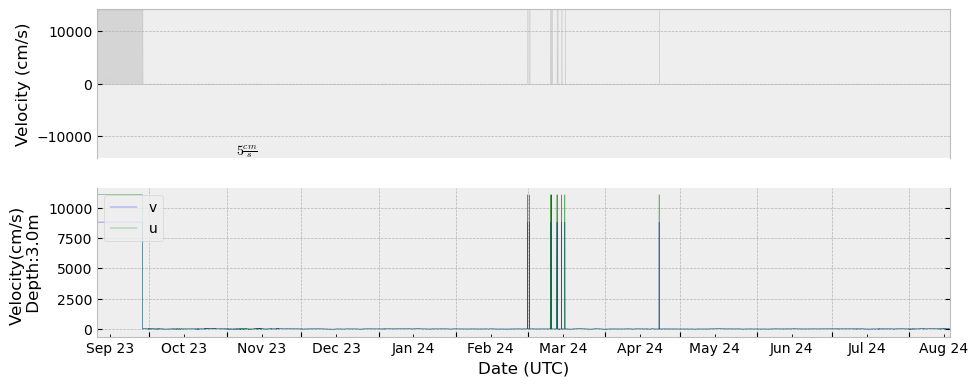

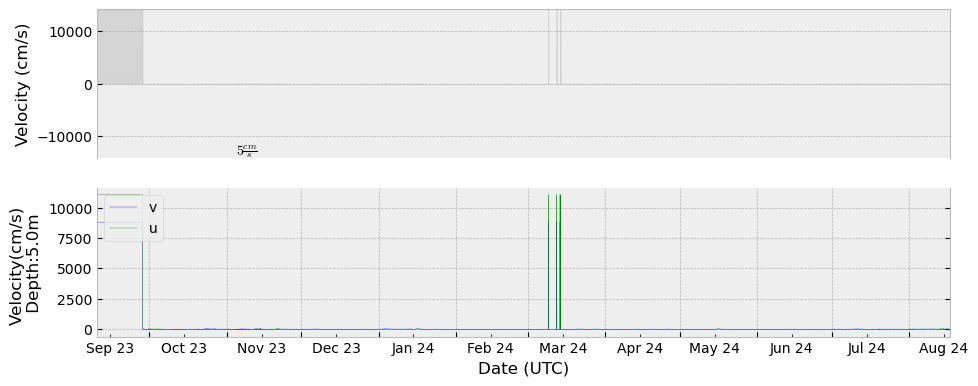

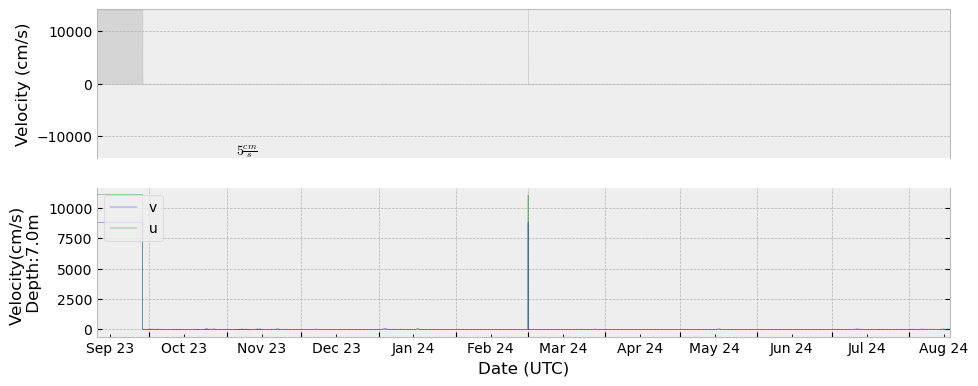

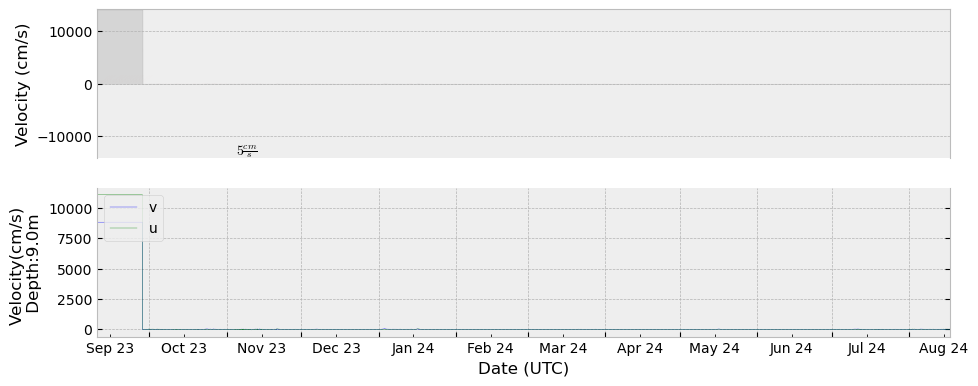

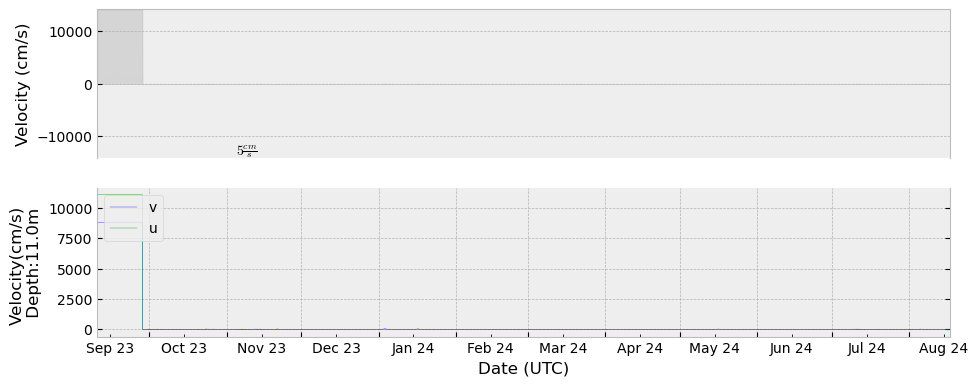

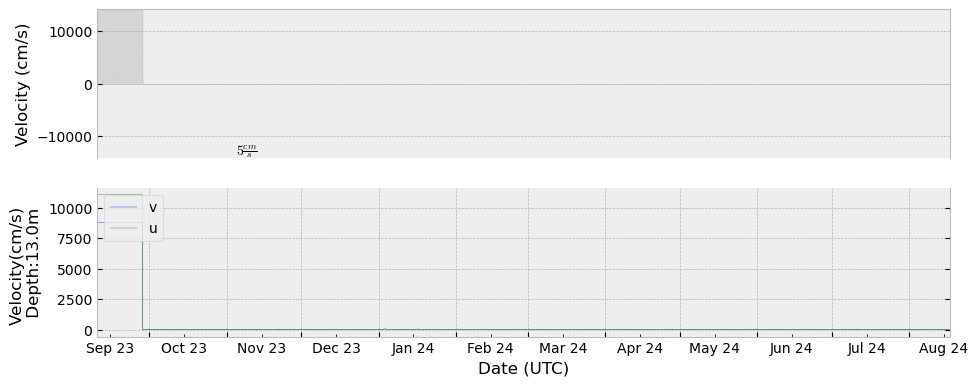

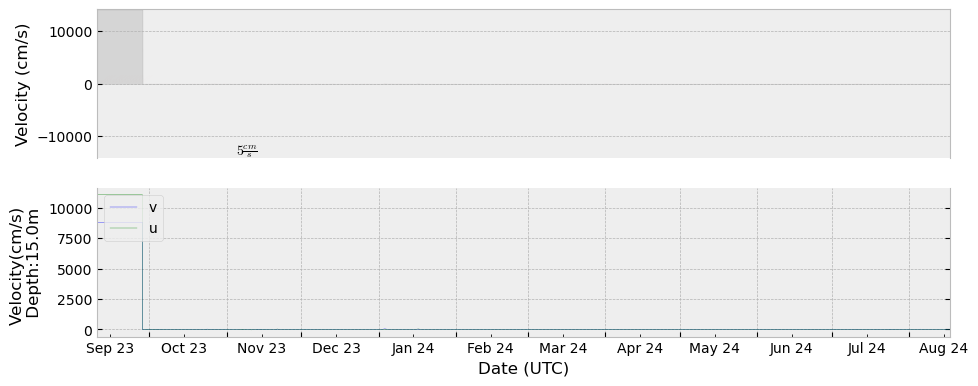

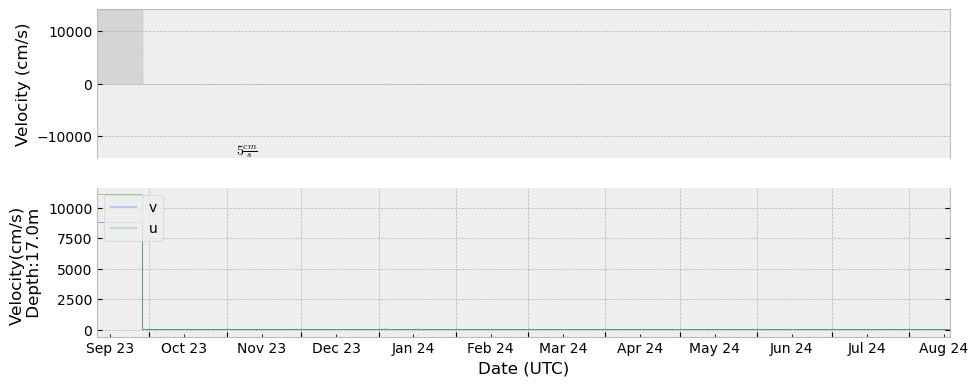

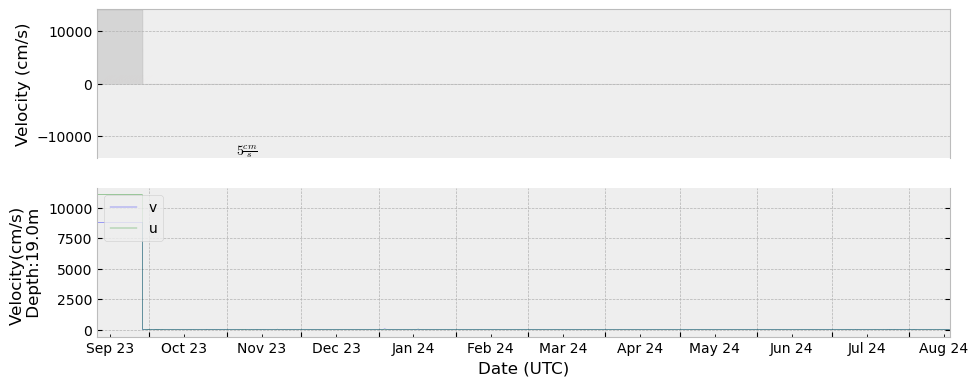

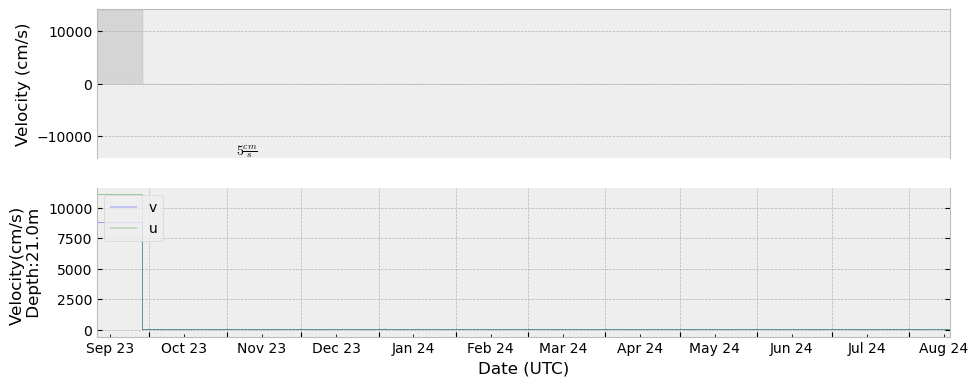

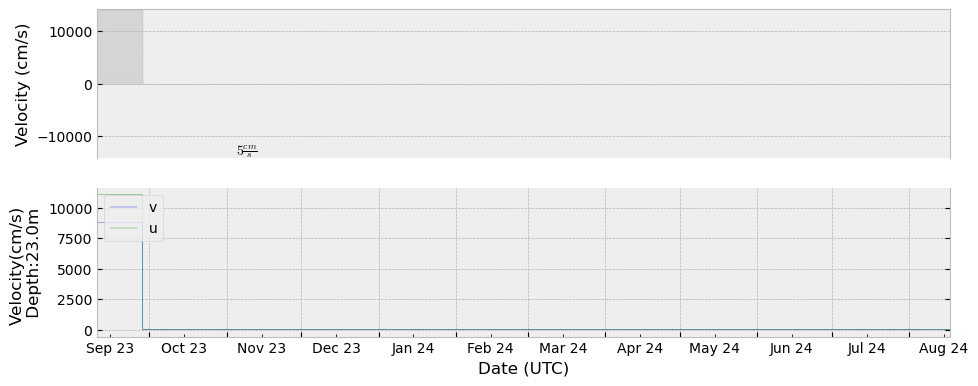

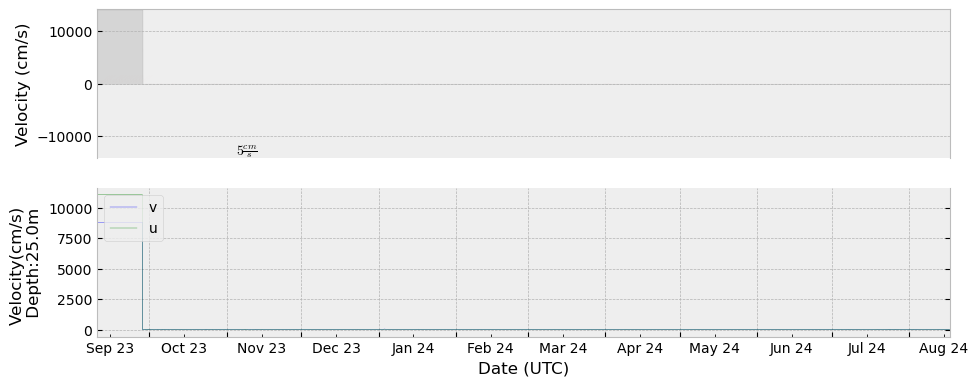

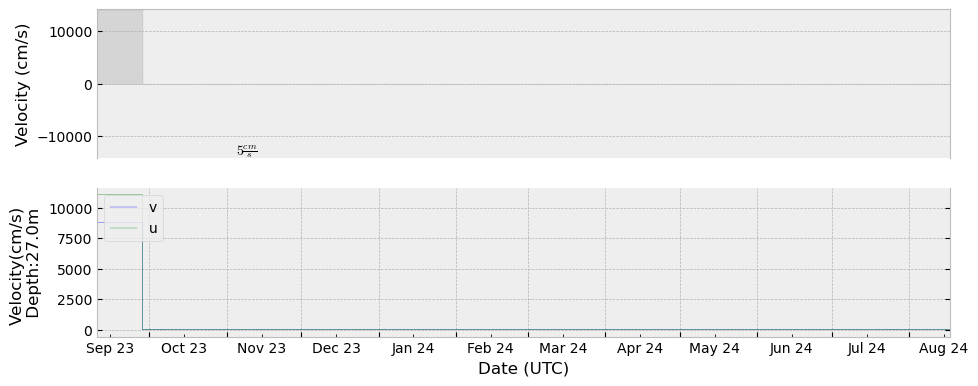

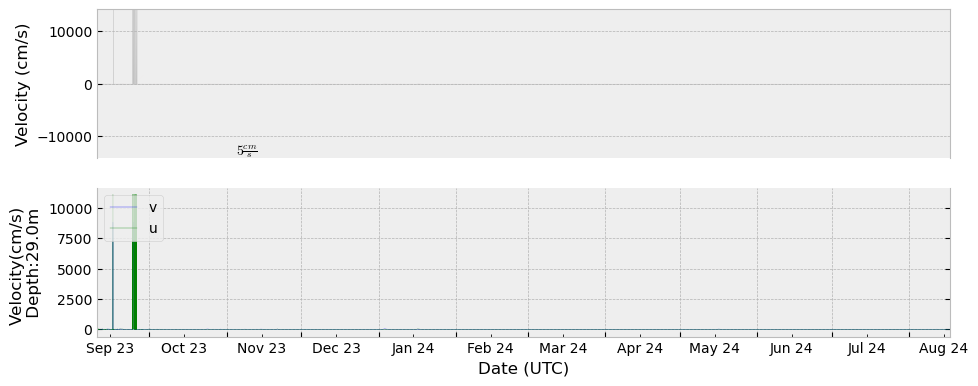

In [49]:
for i in range(0,len(xdf.depth),1):
    try:
        p1 = TimeSeriesStickPlot.Timeseries1dStickPlot()
        plt1, fig1 = p1.plot(timedata=xdf.time, 
                         udata=xdf.isel(depth=i,latitude=0,longitude=0).u_curr_comp, 
                         vdata=xdf.isel(depth=i,latitude=0,longitude=0).v_curr_comp,
                         rotate=0,
                         ylabel = f'Velocity(cm/s) \n {xdf.isel(depth=i).depth.values}m ')
        plt1.ylabel(f'Velocity(cm/s) \n Depth:{xdf.isel(depth=i).depth.values}m ')
    except:
        pass

In [50]:
xdf =xdf.where(np.abs(xdf.u_curr_comp) <=750,np.nan)
xdf

<xarray.Dataset> Size: 12MB
Dimensions:          (latitude: 1, longitude: 1, time: 8199, depth: 23)
Coordinates:
  * time             (time) datetime64[ns] 66kB 2023-09-10 ... 2024-08-17T09:...
  * depth            (depth) float64 184B -15.0 -13.0 -11.0 ... 25.0 27.0 29.0
  * latitude         (latitude) float64 8B 71.83
  * longitude        (longitude) float64 8B -166.0
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 2MB nan ... 1...
    v_curr_comp      (latitude, longitude, time, depth) float64 2MB nan ... 7...
    w_curr_comp      (latitude, longitude, time, depth) float64 2MB nan ... 0.0
    w_curr_comp_err  (latitude, longitude, time, depth) float64 2MB nan ... 0.5
    agc1             (latitude, longitude, time, depth) float64 2MB nan ... 1...
    agc2             (latitude, longitude, time, depth) float64 2MB nan ... 1...
    agc3             (latitude, longitude, time, depth) float64 2MB nan ... 1...
    agc4             (latitude, longitude, time, depth) float64 2MB nan ... 1...
Attributes:
    Latitude_DegMMddW:                      71 49.656 N
    Longitude_DegMMddN:                     166 01.127 W
    MooringID:                              23CKP-3A
    platform_deployment_date:               2023-09-28T05:11:00Z
    platform_deployment_cruise_name:        SKQ202312S
    platform_recovery_date:                 2024-08-17T14:20:00Z
    platform_recovery_cruise_name:          SKQ202412S
    platform_deployment_recovery_comments:  
    WaterDepth:                             44.0
    date_created:                           2024-09-09T12:14:03Z
    date_modified:                          
    QC_indicator:                           unknown

In [51]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

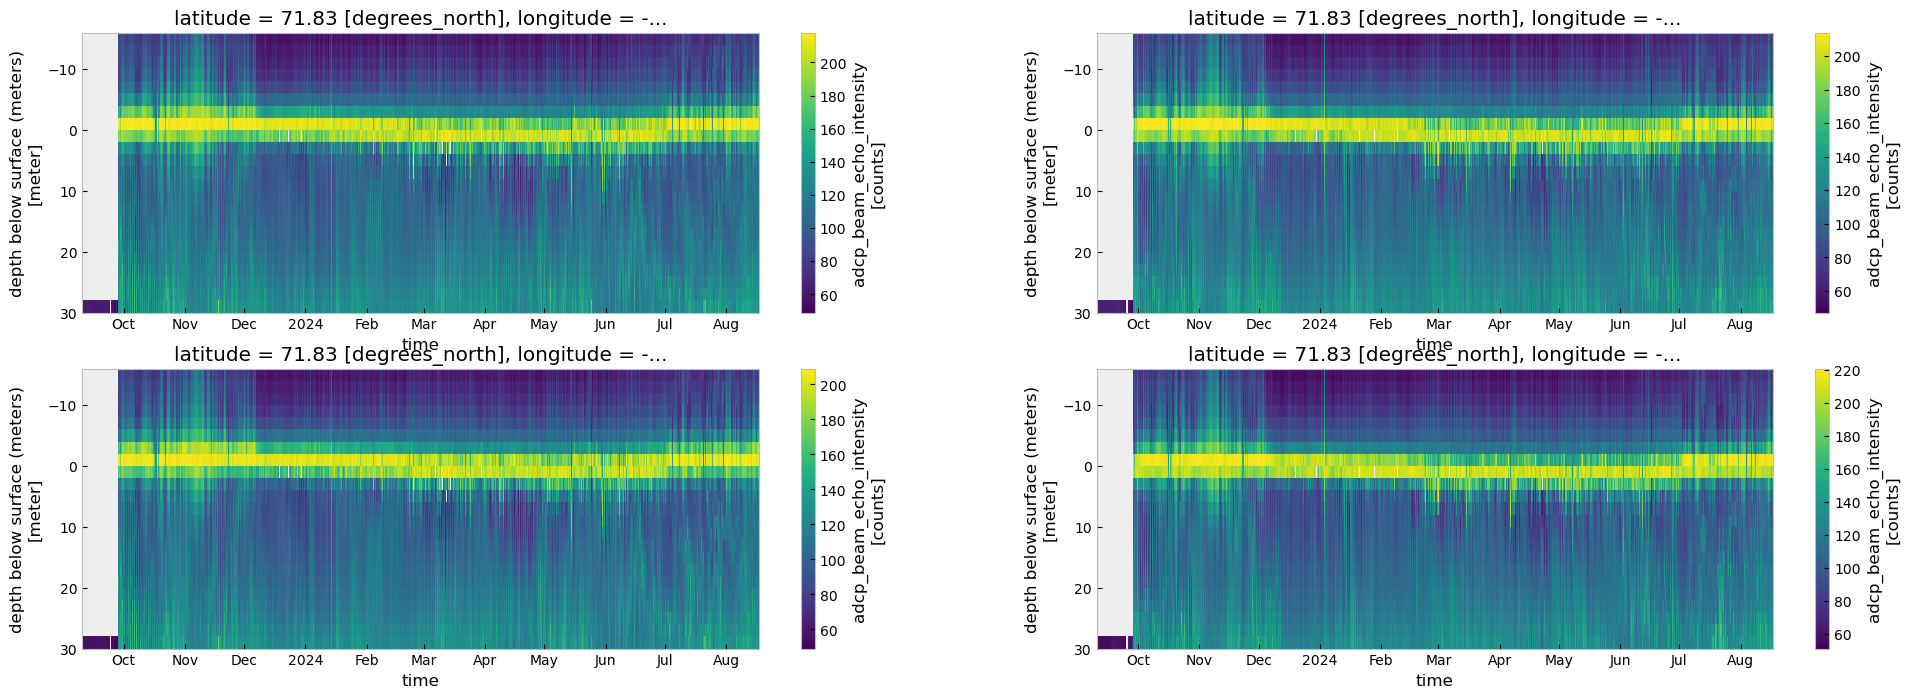

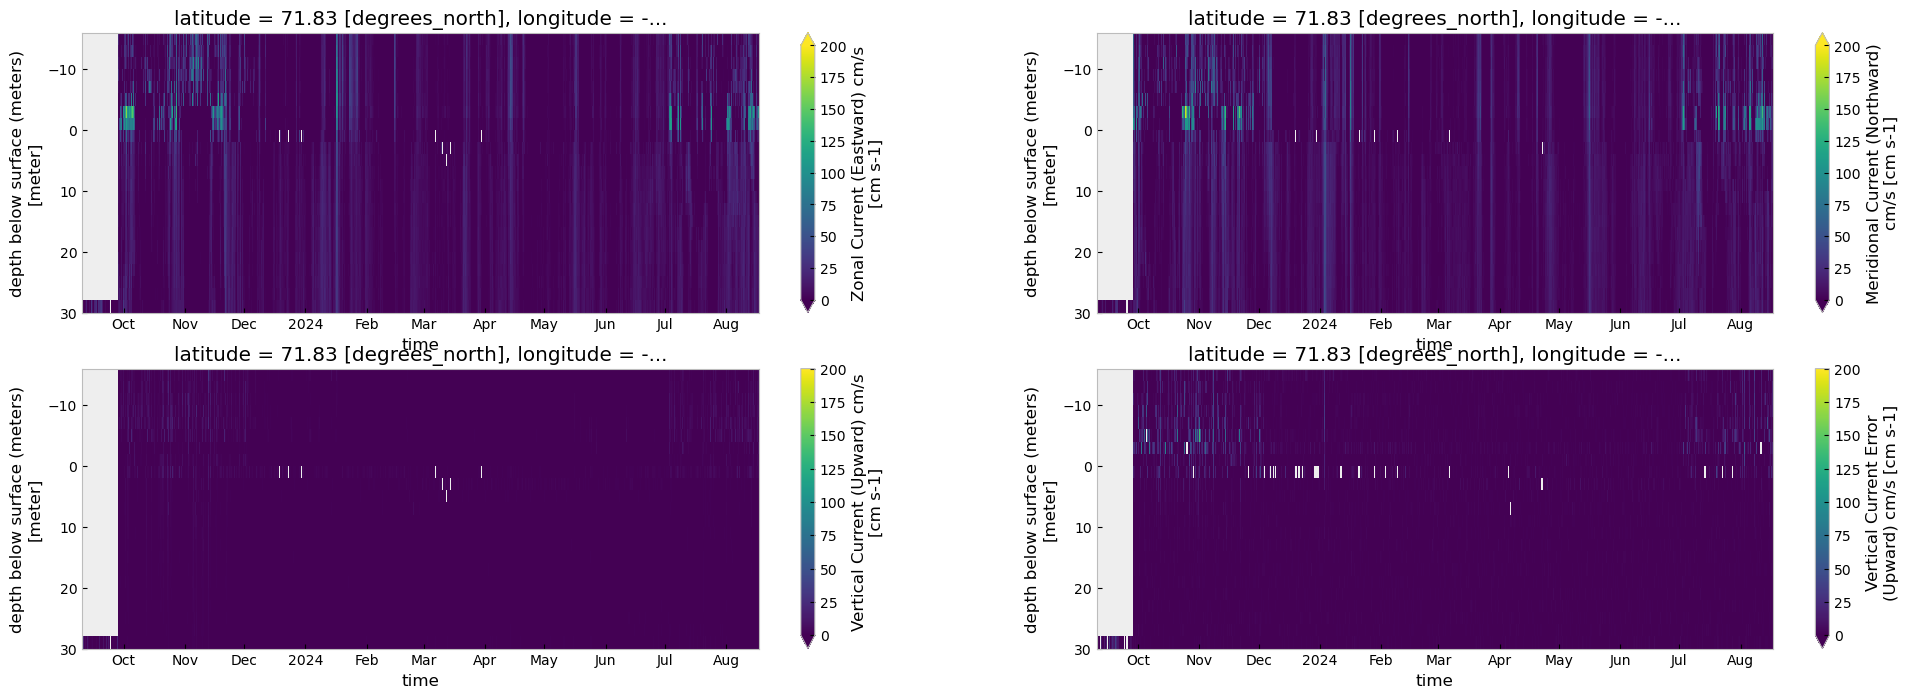

In [52]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [53]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >750cm/s'
except:
    xdf.attrs['history'] = '  removed U,V >750cm/s'    

## Trim above surface (negative values)

In [54]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [55]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [56]:
ixdf.to_netcdf('23ckp3a_0033m.trimmed.nc')

In [57]:
xdf = xa.load_dataset('23ckp3a_0033m.trimmed.nc')

In [58]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2h')

In [59]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

In [60]:
ixdf = ixdf.interpolate_na(dim='depth',max_gap=3)

In [61]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 2 vertical bin'

## Interpolate over singleton missing gaps linearly

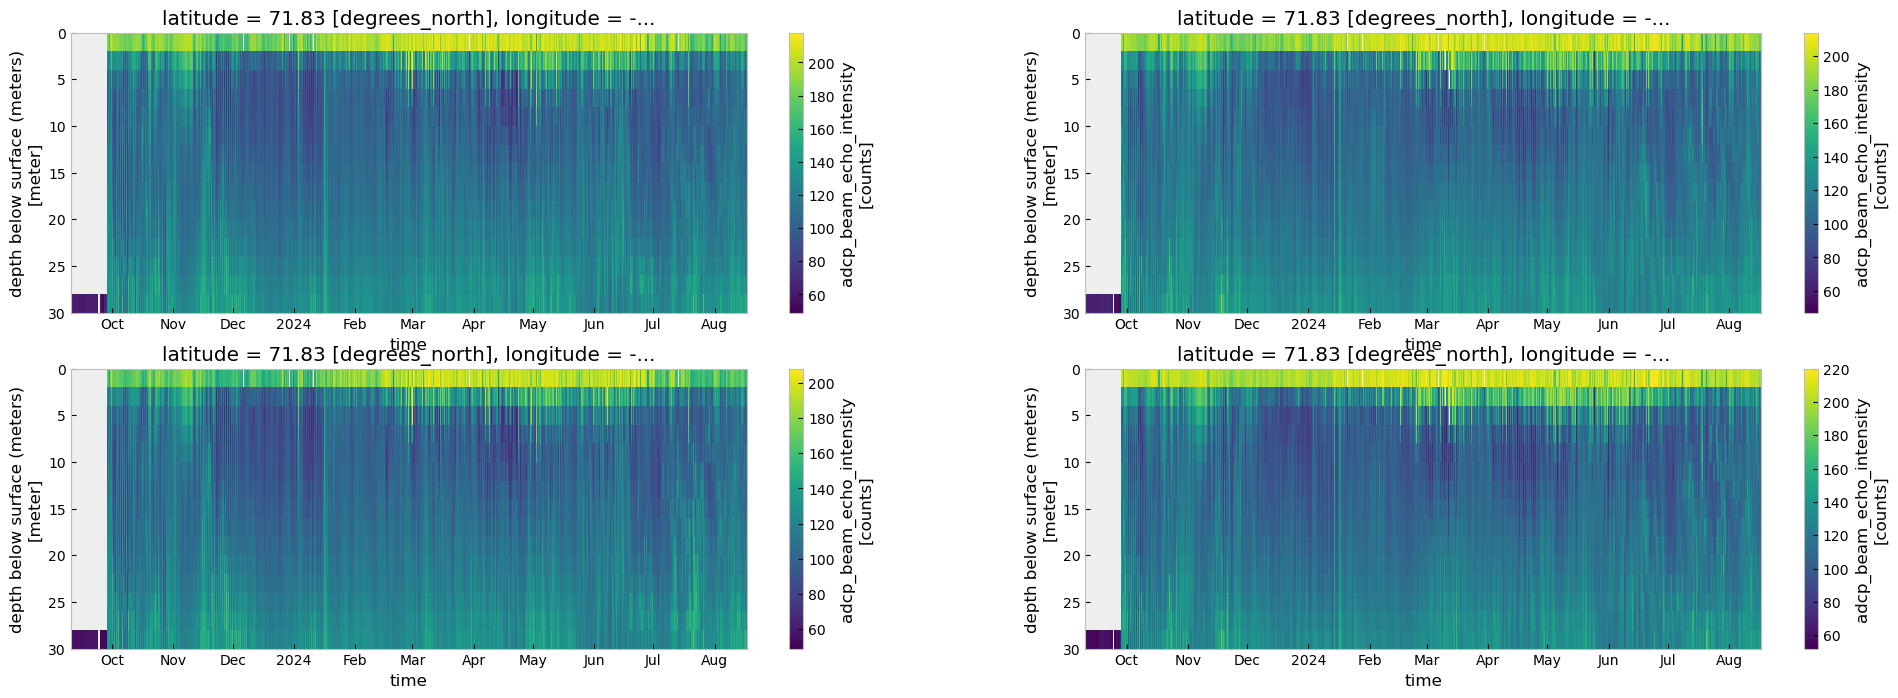

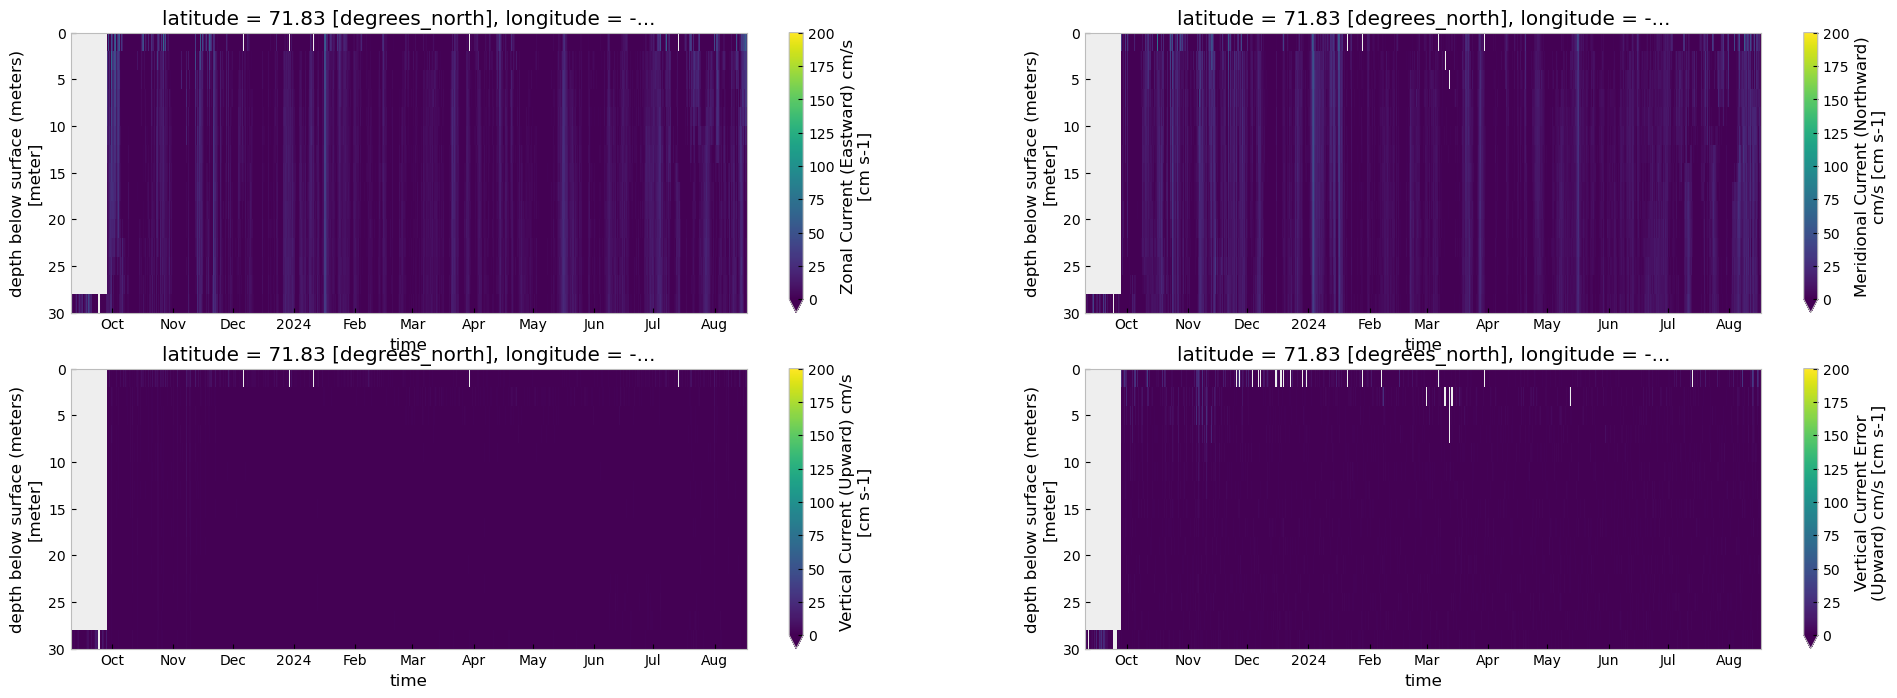

In [62]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [63]:
ixdf.to_netcdf('23ckp3a_0033m.filtered.nc')